<a href="https://colab.research.google.com/github/Kevangi/summer-to-winter-cyclegan/blob/main/inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys

In [ ]:
sys.path.append('/content/drive/MyDrive/Summer2Winter')

In [ ]:
import torch
import os
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
from models.generator import Generator

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [ ]:
checkpoint_path = "/content/drive/MyDrive/Summer2Winter/checkpoints/cyclegan_epoch_10.pth"

G = Generator().to(device)

checkpoint = torch.load(checkpoint_path, map_location=device)
G.load_state_dict(checkpoint["G_state_dict"])

G.eval()
print("Model loaded successfully.")

Model loaded successfully.


In [ ]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

In [ ]:
import random

test_folder = "/content/drive/MyDrive/Summer2Winter/dataset/testA"

image_list = os.listdir(test_folder)
random_image_name = random.choice(image_list)
test_image_path = os.path.join(test_folder, random_image_name)

print("Selected image:", random_image_name)

image = Image.open(test_image_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0).to(device)

Selected image: 2014-09-10 21_23_00.jpg


In [ ]:
with torch.no_grad():
    fake_image = G(input_tensor)

In [ ]:
def denormalize(tensor):
    tensor = tensor * 0.5 + 0.5
    return tensor.clamp(0,1)

output_image = denormalize(fake_image.squeeze(0)).permute(1,2,0).cpu()
input_image = denormalize(input_tensor.squeeze(0)).permute(1,2,0).cpu()

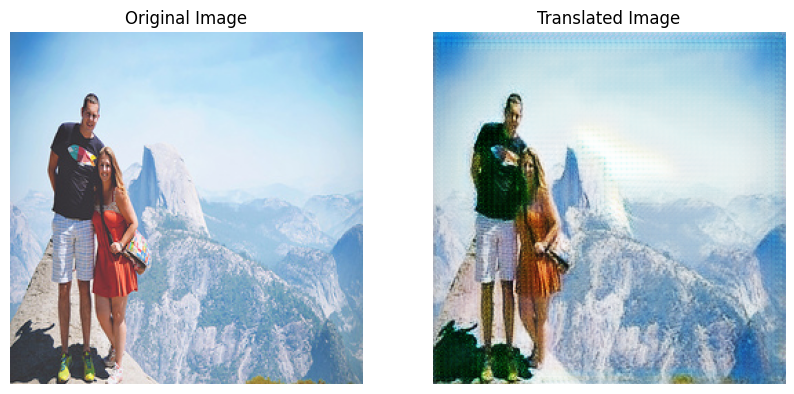

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(input_image)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Translated Image")
plt.imshow(output_image)
plt.axis("off")

plt.show()

In [ ]:
mkdir /content/drive/MyDrive/Summer2Winter/results

In [ ]:
save_path = "/content/drive/MyDrive/Summer2Winter/results/output.jpg"

output_pil = Image.fromarray((output_image.numpy()*255).astype("uint8"))
output_pil.save(save_path)

print("Image saved at:", save_path)

Image saved at: /content/drive/MyDrive/Summer2Winter/results/output.jpg


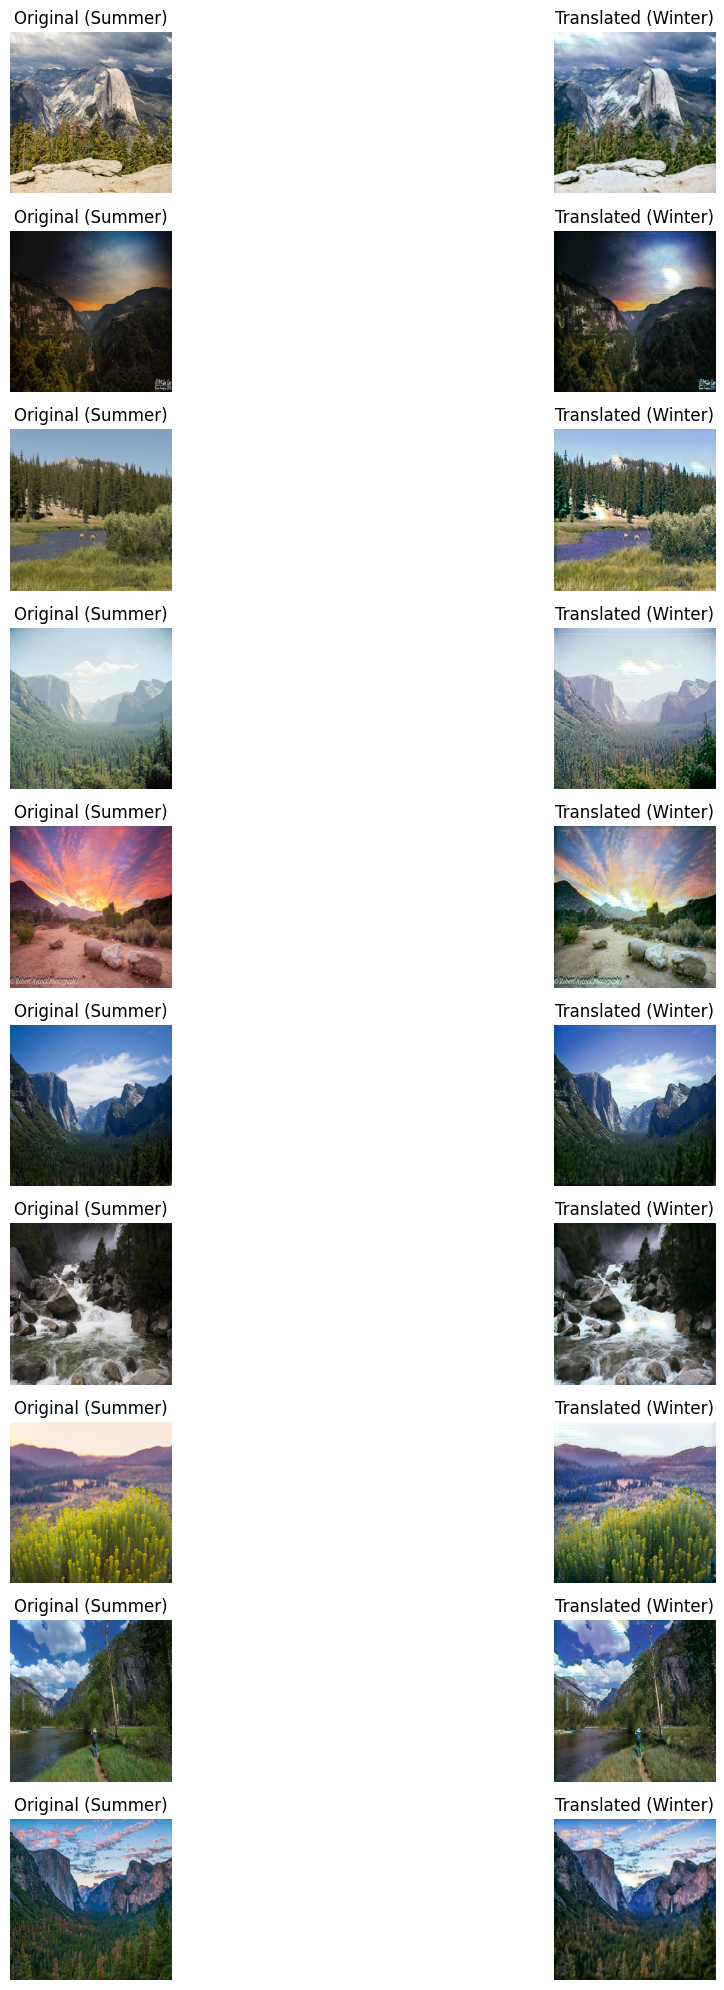

In [ ]:
test_folder = "/content/drive/MyDrive/Summer2Winter/dataset/testA"

image_list = [
    f for f in os.listdir(test_folder)
    if f.lower().endswith((".jpg", ".png", ".jpeg"))
]

random_images = random.sample(image_list, 10)

plt.figure(figsize=(15, 20))

for i, img_name in enumerate(random_images):

    img_path = os.path.join(test_folder, img_name)

    try:
        image = Image.open(img_path).convert("RGB")
        input_tensor = transform(image).unsqueeze(0).to(device)

        with torch.no_grad():
            fake_image = G(input_tensor)

        def denormalize(tensor):
            tensor = tensor * 0.5 + 0.5
            return tensor.clamp(0,1)

        input_image = denormalize(input_tensor.squeeze(0)).permute(1,2,0).cpu()
        output_image = denormalize(fake_image.squeeze(0)).permute(1,2,0).cpu()

        plt.subplot(10, 2, 2*i + 1)
        plt.imshow(input_image)
        plt.title("Original (Summer)")
        plt.axis("off")

        plt.subplot(10, 2, 2*i + 2)
        plt.imshow(output_image)
        plt.title("Translated (Winter)")
        plt.axis("off")

    except:
        print("Skipping corrupted file:", img_name)

plt.tight_layout()
plt.show()

In [ ]:
test_folder = "/content/drive/MyDrive/Summer2Winter/dataset/testA"
fake_folder = "/content/drive/MyDrive/Summer2Winter/results"

os.makedirs(fake_folder, exist_ok=True)

for img_name in os.listdir(test_folder):
    img_path = os.path.join(test_folder, img_name)

    try:
        image = Image.open(img_path).convert("RGB")
        input_tensor = transform(image).unsqueeze(0).to(device)

        with torch.no_grad():
            fake_image = G(input_tensor)

        output_image = denormalize(fake_image.squeeze(0)).permute(1,2,0).cpu()
        output_pil = Image.fromarray((output_image.numpy()*255).astype("uint8"))

        output_pil.save(os.path.join(fake_folder, img_name))

    except:
        continue

print("Fake images generated for evaluation.")

Fake images generated for evaluation.


In [ ]:
!pip install pytorch-fid

In [ ]:
!python -m pytorch_fid \
/content/drive/MyDrive/Summer2Winter/dataset/testB \
/content/drive/MyDrive/Summer2Winter/results

Downloading: "https://github.com/mseitzer/pytorch-fid/releases/download/fid_weights/pt_inception-2015-12-05-6726825d.pth" to /root/.cache/torch/hub/checkpoints/pt_inception-2015-12-05-6726825d.pth
100% 91.2M/91.2M [00:00<00:00, 223MB/s]
100% 5/5 [00:11<00:00,  2.31s/it]
100% 7/7 [00:02<00:00,  2.51it/s]
FID:  113.63936871923622
